In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn import tree


In [2]:
data = pd.read_csv('Mall_Customer.csv')
print(data)

     CustomerID   Genre  Age  Annual_Income_(k$)  Spending_Score
0             1    Male   19                  15              39
1             2    Male   21                  15              81
2             3  Female   20                  16               6
3             4  Female   23                  16              77
4             5  Female   31                  17              40
..          ...     ...  ...                 ...             ...
195         196  Female   35                 120              79
196         197  Female   45                 126              28
197         198    Male   32                 126              74
198         199    Male   32                 137              18
199         200    Male   30                 137              83

[200 rows x 5 columns]


In [25]:
print(data['Genre'].unique())

[nan]


In [28]:
data['Genre'] = data['Genre'].fillna('Unknown')

In [48]:
# Step 3: Preprocess the Data
# Convert target variable to binary (0 for 'no', 1 for 'yes')
data['Genre'] = data['Genre'].astype(str).str.strip().str.lower().map({'male': 0,'female':1})
print(data.head())

   Genre  Age  Annual_Income_(k$)  Spending_Score  Purchase
0    NaN   19                  15              39         0
1    NaN   21                  15              81         1
2    NaN   20                  16               6         0
3    NaN   23                  16              77         1
4    NaN   31                  17              40         0


In [34]:
data['Purchase'] = (data['Spending_Score'] > data['Spending_Score'].median()).astype(int)
X = data.drop(['Spending_Score', 'Purchase'], axis=1)
y = data['Purchase']


In [38]:
from sklearn.model_selection import train_test_split

In [39]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [40]:
# Initialize and train the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [41]:
# Predict on the test set
y_pred = clf.predict(X_test)


In [45]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Calculate and print the metrics
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test,y_pred))

Accuracy: 0.6666666666666666
Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.78      0.71        32
           1       0.68      0.54      0.60        28

    accuracy                           0.67        60
   macro avg       0.67      0.66      0.66        60
weighted avg       0.67      0.67      0.66        60

Confusion Matrix:
 [[25  7]
 [13 15]]


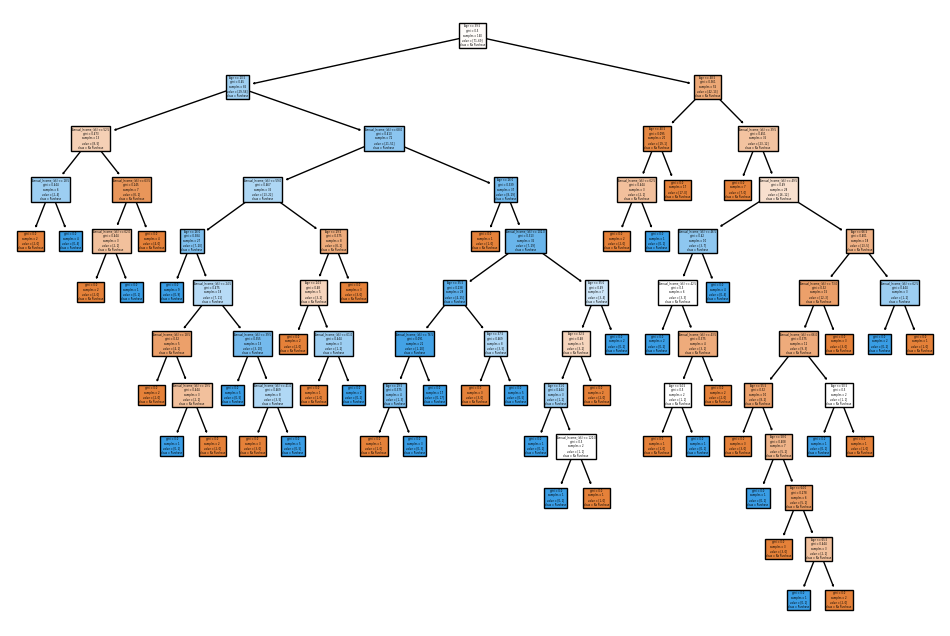

In [46]:
# Plot the decision tree
plt.figure(figsize=(12, 8))
tree.plot_tree(clf, feature_names=X.columns, class_names=['No Purchase', 'Purchase'], filled=True)
plt.show()
